Drinking Water - SAFER Dashboard Failing and At-Risk Drinking Water Systems


The Division of Drinking Water (DDW) identifies Failing and At-Risk community water systems and K-12 non-transient, non-community schools. This information is displayed online in the Safe and Affordable Funding for Equity and Resilience (SAFER) Dashboard. The data utilized for this assessment is derived from multiple sources: self-reported from water systems, data generated by DDW staff, other California state agencies, and U.S. Census. The data sources, calculation methods, Failing and At-Risk criteria, etc. are fully documented in the annual Drinking Water Needs Assessment report which is published annually on the State Water Board’s website.



Problem Statement:
The given dataset helped to find out that given features have been successfully helped in evaluating the risk assessment program in the USA drinking water system. what is the prediction that the drinking water system to be safe in America due to its risk assessment strategy and result? its a classification problem that can be solved using the PCA and LDA to reduce the dimensionality if data based on its impact on the target variable. the target variable will be the risk assessment result 

Dataset:
#https://data.ca.gov/dataset/safer-failing-and-at-risk-drinking-water-systems

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#importing our file 

In [3]:
df=pd.read_csv('Drinking_Water_Risk_Assessment.CSV.csv')

In [4]:
df.shape

(3232, 132)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Columns: 132 entries, TINWSYS_IS_NUMBER to CREATED_DATE
dtypes: float64(4), int64(3), object(125)
memory usage: 3.3+ MB


In [6]:
df.describe()

,TINWSYS_IS_NUMBER,SERVICE_CONNECTIONS,POPULATION,LATITUDE_MEASURE,LONGITUDE_MEASURE,FUNDING_RECEIVED_SINCE_2017,TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017
count,3232.000000,3232.000000,3.232000e+03,3232.000000,3232.000000,3.232000e+03,3.232000e+03
mean,5371.544245,3062.199567,1.234849e+04,36.924307,-120.157811,9.971363e+05,2.492554e+04
std,3233.112532,18245.985934,8.738779e+04,2.521175,4.676195,1.612632e+07,1.169464e+05
min,3.000000,1.000000,0.000000e+00,0.000000,-124.290366,0.000000e+00,0.000000e+00
25%,2723.750000,22.000000,9.000000e+01,35.105804,-121.765515,0.000000e+00,0.000000e+00
50%,4919.500000,72.000000,2.750000e+02,37.090987,-120.666091,0.000000e+00,0.000000e+00
75%,7987.750000,518.000000,1.744000e+03,38.478016,-118.855719,0.000000e+00,0.000000e+00
max,15790.000000,707681.000000,3.868811e+06,41.966269,0.000000,6.974797e+08,2.216664e+06


# it can be stated that population, funding and technical funding had impact on the risk assessment outcome majorly 

In [7]:
df.columns

Index(['TINWSYS_IS_NUMBER', 'WATER_SYSTEM_NUMBER', 'SYSTEM_NAME',
       'REGULATING_AGENCY', 'COUNTY', 'FEDERAL_CLASSIFICATION_TYPE',
       'SERVICE_CONNECTIONS', 'POPULATION', 'OWNER_TYPE', 'PL_ADDRESS',
       ...
       'MONITORING_AND_REPORTING_VIOLATIONS_THRESHOLD_MET',
       'MONITORING_AND_REPORTING_VIOLATIONS_SCORE',
       'MONITORING_AND_REPORTING_VIOLATIONS_WEIGHTED_SCORE',
       'SIGNIFICANT_DEFICIENCIES_RISK_LEVEL',
       'SIGNIFICANT_DEFICIENCIES_THRESHOLD_MET',
       'SIGNIFICANT_DEFICIENCIES_RAW_SCORE',
       'SIGNIFICANT_DEFICIENCIES_WEIGHTED_SCORE',
       'FUNDING_RECEIVED_SINCE_2017',
       'TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017', 'CREATED_DATE'],
      dtype='object', length=132)

In [8]:
df.drop('CREATED_DATE', axis=1, inplace= True)

In [9]:
df.shape

(3232, 131)

In [10]:
df.RISK_ASSESSMENT_RESULT.unique()

array(['Not At-Risk', 'At-Risk', 'Not Assessed', 'Potentially At-Risk'],
      dtype=object)

In [11]:
df.RISK_ASSESSMENT_RESULT.value_counts()

Not At-Risk            1728
At-Risk                 836
Potentially At-Risk     497
Not Assessed            171
Name: RISK_ASSESSMENT_RESULT, dtype: int64

In [12]:
df.isnull().sum()

TINWSYS_IS_NUMBER                          0
WATER_SYSTEM_NUMBER                        0
SYSTEM_NAME                                0
REGULATING_AGENCY                          0
COUNTY                                     0
                                          ..
SIGNIFICANT_DEFICIENCIES_THRESHOLD_MET     0
SIGNIFICANT_DEFICIENCIES_RAW_SCORE         0
SIGNIFICANT_DEFICIENCIES_WEIGHTED_SCORE    0
FUNDING_RECEIVED_SINCE_2017                0
TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017    0
Length: 131, dtype: int64

In [13]:
df.dropna()

,TINWSYS_IS_NUMBER,WATER_SYSTEM_NUMBER,SYSTEM_NAME,REGULATING_AGENCY,COUNTY,FEDERAL_CLASSIFICATION_TYPE,SERVICE_CONNECTIONS,POPULATION,OWNER_TYPE,PL_ADDRESS,...,MONITORING_AND_REPORTING_VIOLATIONS_RISK_LEVEL,MONITORING_AND_REPORTING_VIOLATIONS_THRESHOLD_MET,MONITORING_AND_REPORTING_VIOLATIONS_SCORE,MONITORING_AND_REPORTING_VIOLATIONS_WEIGHTED_SCORE,SIGNIFICANT_DEFICIENCIES_RISK_LEVEL,SIGNIFICANT_DEFICIENCIES_THRESHOLD_MET,SIGNIFICANT_DEFICIENCIES_RAW_SCORE,SIGNIFICANT_DEFICIENCIES_WEIGHTED_SCORE,FUNDING_RECEIVED_SINCE_2017,TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017


In [14]:
df.corr()

C:\Users\SHILPA\AppData\Local\Temp\ipykernel_3636\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,TINWSYS_IS_NUMBER,SERVICE_CONNECTIONS,POPULATION,LATITUDE_MEASURE,LONGITUDE_MEASURE,FUNDING_RECEIVED_SINCE_2017,TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017
TINWSYS_IS_NUMBER,1.000000,-0.113078,-0.095307,-0.039061,0.030327,-0.042452,-0.016511
SERVICE_CONNECTIONS,-0.113078,1.000000,0.981840,-0.086711,0.025362,0.709502,-0.031588
POPULATION,-0.095307,0.981840,1.000000,-0.083398,0.025179,0.763129,-0.027520
LATITUDE_MEASURE,-0.039061,-0.086711,-0.083398,1.000000,-0.770388,-0.024298,-0.004130
LONGITUDE_MEASURE,0.030327,0.025362,0.025179,-0.770388,1.000000,0.007738,-0.000846
FUNDING_RECEIVED_SINCE_2017,-0.042452,0.709502,0.763129,-0.024298,0.007738,1.000000,0.000705
TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017,-0.016511,-0.031588,-0.027520,-0.004130,-0.000846,0.000705,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


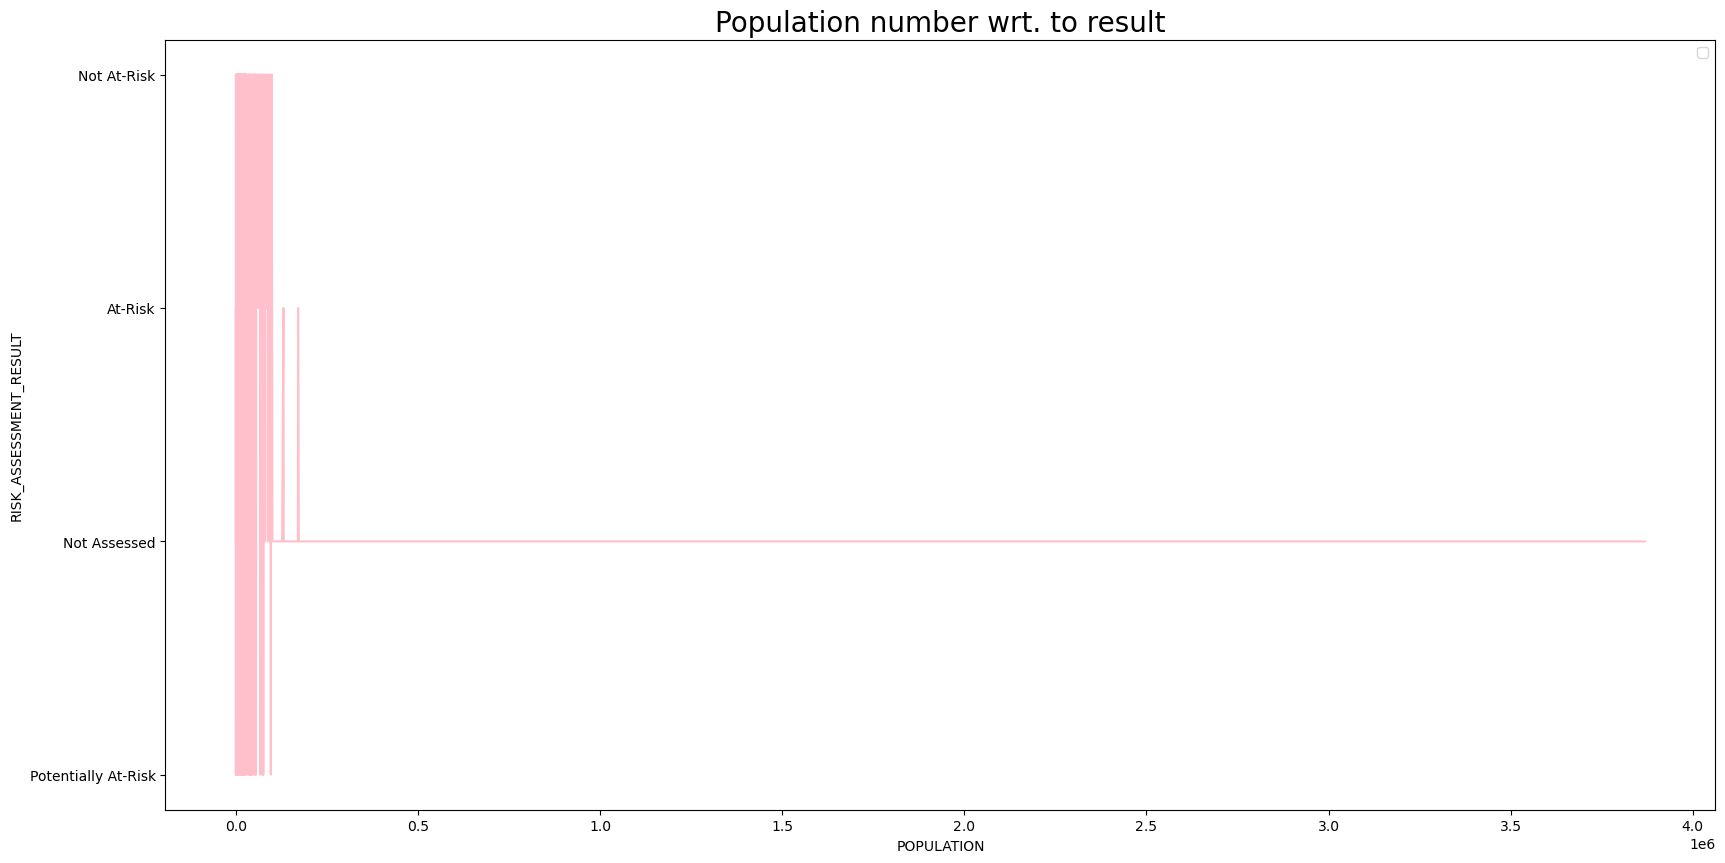

In [15]:
plt.figure(figsize= (20,10))
sns.lineplot(x=df['POPULATION'], y=df['RISK_ASSESSMENT_RESULT'], color= 'pink')
plt.legend()
plt.xlabel ('POPULATION')
plt.ylabel('RISK_ASSESSMENT_RESULT')
plt.title('Population number wrt. to result', size= 20)
plt.show()

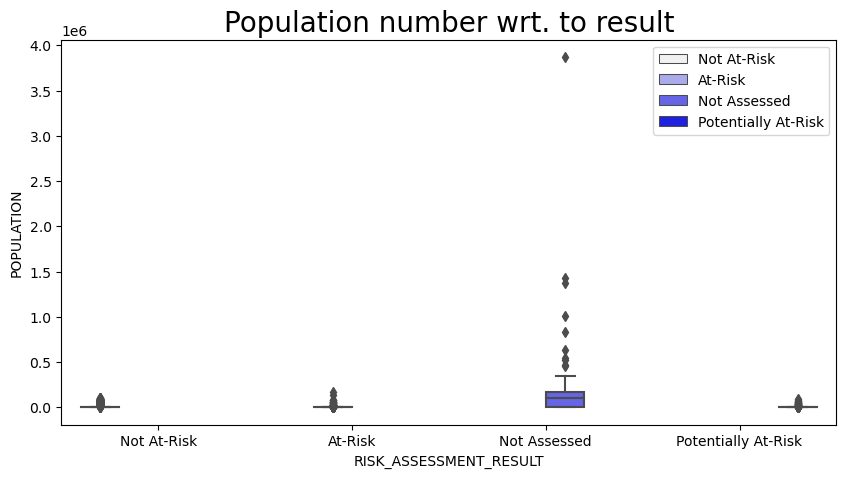

In [16]:
plt.figure(figsize= (10,5))
sns.boxplot(y=df['POPULATION'], x=df['RISK_ASSESSMENT_RESULT'], color= 'blue', hue= df['RISK_ASSESSMENT_RESULT'])
plt.legend()
plt.ylabel ('POPULATION', size= 10)
plt.xlabel('RISK_ASSESSMENT_RESULT', size= 10)
plt.title('Population number wrt. to result', size= 20)
plt.show()

In [441]:
df.CURRENT_FAILING.value_counts() 


Not Failing    2844
Failing         388
Name: CURRENT_FAILING, dtype: int64

In [442]:
df.FINAL_SAFER_STATUS.value_counts() 



Not At-Risk            1691
At-Risk                 533
Potentially At-Risk     453
Failing                 388
Not Assessed            167
Name: FINAL_SAFER_STATUS, dtype: int64

In [443]:
df.FUNDING_RECEIVED_SINCE_2017.sum()


3222744371.0600004

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


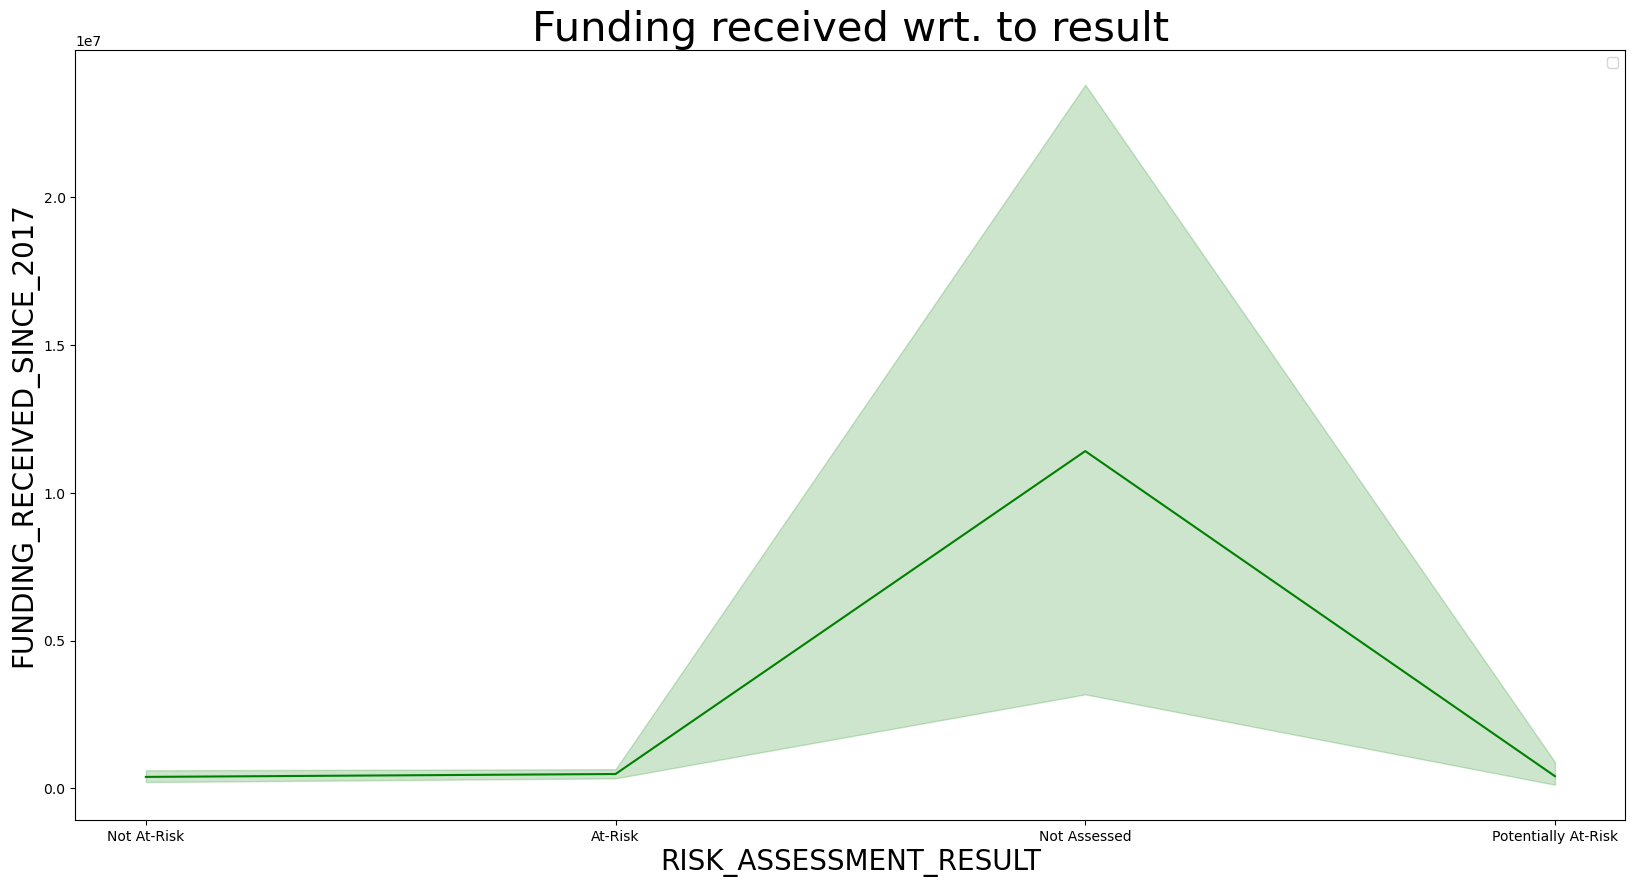

In [444]:
plt.figure(figsize= (20,10))
sns.lineplot(y=df['FUNDING_RECEIVED_SINCE_2017'], x=df['RISK_ASSESSMENT_RESULT'], color= 'green')
plt.legend()
plt.ylabel ('FUNDING_RECEIVED_SINCE_2017',size= 20)
plt.xlabel('RISK_ASSESSMENT_RESULT',size= 20)
plt.title('Funding received wrt. to result', size= 30)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


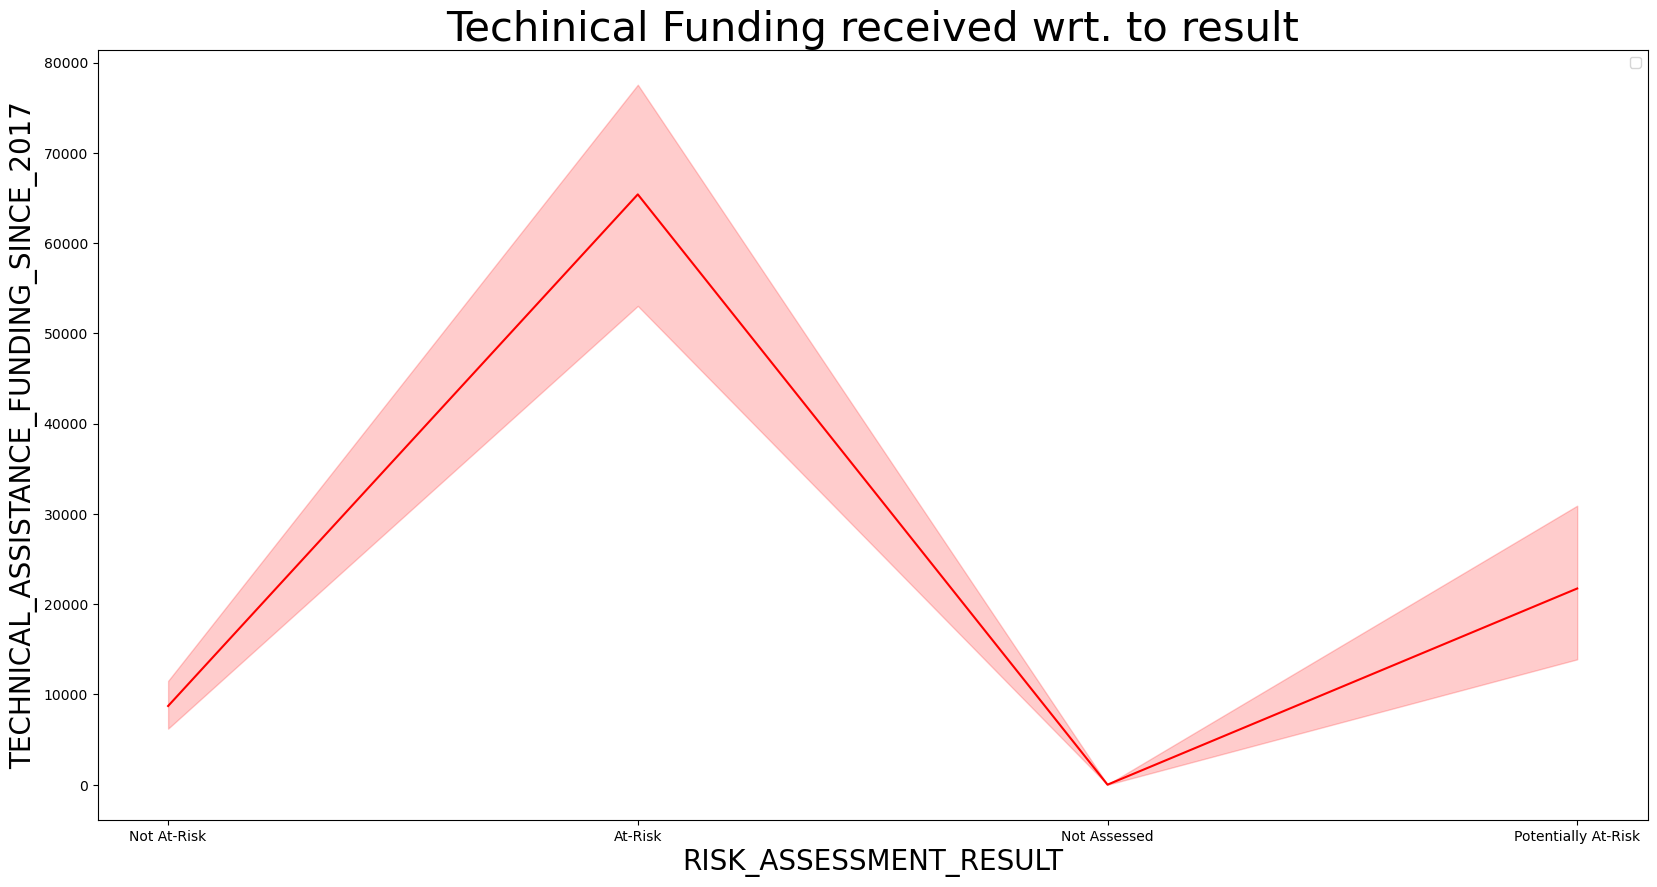

In [445]:
plt.figure(figsize= (20,10))
sns.lineplot(y=df['TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017'], x=df['RISK_ASSESSMENT_RESULT'], color= 'red')
plt.legend()
plt.ylabel ('TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017',size= 20)
plt.xlabel('RISK_ASSESSMENT_RESULT',size= 20)
plt.title('Techinical Funding received wrt. to result', size= 30)
plt.show()

C:\Users\SHILPA\AppData\Local\Temp\ipykernel_3636\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

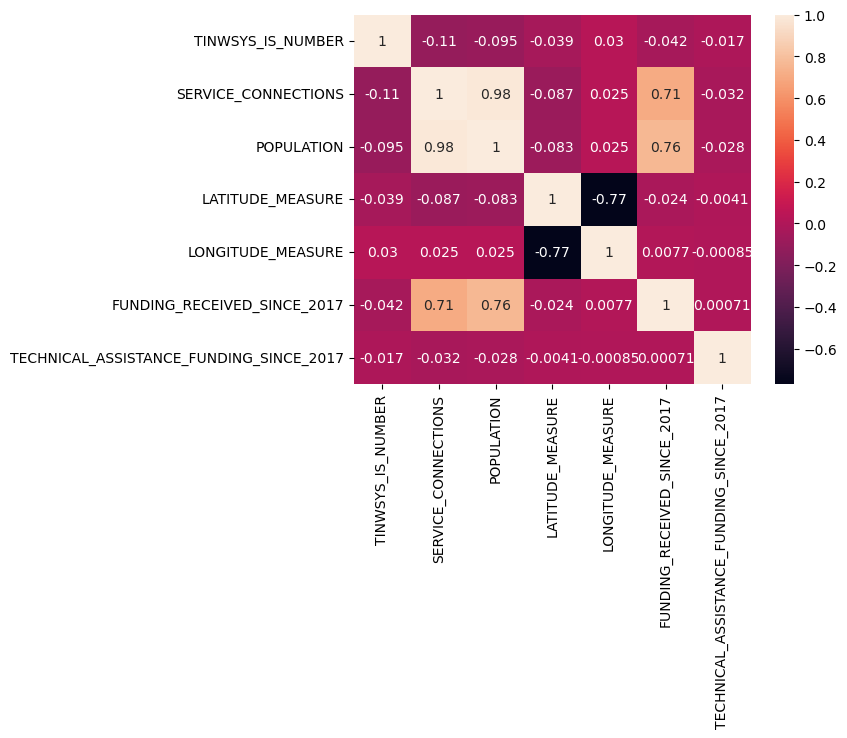

In [18]:
sns.heatmap(df.corr(), annot = True)

In [446]:
df.TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017.sum()

80559358.69

In [447]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [448]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]=le.fit_transform(df[i])

In [449]:
df1=df

In [450]:
df2=df

## LDA

In [451]:
df1.head()

,TINWSYS_IS_NUMBER,WATER_SYSTEM_NUMBER,SYSTEM_NAME,REGULATING_AGENCY,COUNTY,FEDERAL_CLASSIFICATION_TYPE,SERVICE_CONNECTIONS,POPULATION,OWNER_TYPE,PL_ADDRESS,...,MONITORING_AND_REPORTING_VIOLATIONS_RISK_LEVEL,MONITORING_AND_REPORTING_VIOLATIONS_THRESHOLD_MET,MONITORING_AND_REPORTING_VIOLATIONS_SCORE,MONITORING_AND_REPORTING_VIOLATIONS_WEIGHTED_SCORE,SIGNIFICANT_DEFICIENCIES_RISK_LEVEL,SIGNIFICANT_DEFICIENCIES_THRESHOLD_MET,SIGNIFICANT_DEFICIENCIES_RAW_SCORE,SIGNIFICANT_DEFICIENCIES_WEIGHTED_SCORE,FUNDING_RECEIVED_SINCE_2017,TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017
0,3,0,1982,3,0,0,19,50,3,2351,...,1,1,0,0,1,1,0,0,0.0,0.0
1,4,1,2919,3,0,0,191,459,3,1041,...,1,1,0,0,1,1,0,0,0.0,0.0
2,18,2,473,3,0,0,206,524,1,2186,...,1,1,0,0,1,1,0,0,3000000.0,0.0
3,19,3,1897,3,0,1,1,50,1,1596,...,1,1,0,0,1,1,0,0,380000.0,0.0
4,29,4,24,3,0,0,86695,344855,1,1731,...,2,2,2,2,2,2,2,2,0.0,0.0


In [452]:
X=df1.drop('RISK_ASSESSMENT_RESULT', axis=1)
X

,TINWSYS_IS_NUMBER,WATER_SYSTEM_NUMBER,SYSTEM_NAME,REGULATING_AGENCY,COUNTY,FEDERAL_CLASSIFICATION_TYPE,SERVICE_CONNECTIONS,POPULATION,OWNER_TYPE,PL_ADDRESS,...,MONITORING_AND_REPORTING_VIOLATIONS_RISK_LEVEL,MONITORING_AND_REPORTING_VIOLATIONS_THRESHOLD_MET,MONITORING_AND_REPORTING_VIOLATIONS_SCORE,MONITORING_AND_REPORTING_VIOLATIONS_WEIGHTED_SCORE,SIGNIFICANT_DEFICIENCIES_RISK_LEVEL,SIGNIFICANT_DEFICIENCIES_THRESHOLD_MET,SIGNIFICANT_DEFICIENCIES_RAW_SCORE,SIGNIFICANT_DEFICIENCIES_WEIGHTED_SCORE,FUNDING_RECEIVED_SINCE_2017,TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017
0,3,0,1982,3,0,0,19,50,3,2351,...,1,1,0,0,1,1,0,0,0.0,0.00
1,4,1,2919,3,0,0,191,459,3,1041,...,1,1,0,0,1,1,0,0,0.0,0.00
2,18,2,473,3,0,0,206,524,1,2186,...,1,1,0,0,1,1,0,0,3000000.0,0.00
3,19,3,1897,3,0,1,1,50,1,1596,...,1,1,0,0,1,1,0,0,380000.0,0.00
4,29,4,24,3,0,0,86695,344855,1,1731,...,2,2,2,2,2,2,2,2,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,6226,3227,2072,20,57,0,4822,16595,1,793,...,1,1,0,0,1,1,0,0,0.0,5232.00
3228,6227,3228,652,20,57,0,1229,3712,1,155,...,1,1,0,0,1,1,0,0,0.0,0.00
3229,6228,3229,1963,8,57,0,43,122,1,2334,...,1,1,0,0,1,1,0,0,0.0,0.00
3230,6229,3230,2008,20,57,0,793,2772,1,2357,...,1,1,0,0,1,1,0,0,500000.0,306778.57


In [453]:
y= pd.DataFrame(df1['RISK_ASSESSMENT_RESULT'])
y

,RISK_ASSESSMENT_RESULT
0,2
1,2
2,2
3,0
4,1
...,...
3227,2
3228,2
3229,2
3230,2


In [454]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc
X = sc.fit_transform(X)

In [455]:
y.value_counts()

RISK_ASSESSMENT_RESULT
2                         1728
0                          836
3                          497
1                          171
dtype: int64

In [456]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=29)

In [457]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis(n_components=3)
X = lda.fit_transform(X,y)

C:\Users\SHILPA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Log Reg

In [458]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [459]:
lr.fit(X_train, y_train)

C:\Users\SHILPA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHILPA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [460]:
y_pred_lr= lr.predict(X_test)

In [461]:
y_pred_lr

array([2, 0, 2, 2, 0, 3, 2, 0, 3, 2, 3, 2, 0, 2, 3, 0, 2, 2, 0, 2, 2, 0,
       0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 2, 2, 3, 2, 2, 0, 2, 0, 3, 3, 2, 3, 2, 0, 2, 1, 3, 2,
       2, 2, 2, 0, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 0, 2, 2, 2, 0, 2, 3, 2,
       2, 0, 2, 3, 2, 2, 0, 2, 2, 0, 0, 3, 2, 3, 2, 2, 2, 3, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 0, 2, 0, 3, 2, 2, 0, 1,
       3, 2, 0, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3, 2, 3, 2, 0, 3, 2,
       2, 0, 1, 2, 3, 2, 1, 1, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 0, 3, 2, 2, 2,
       2, 2, 3, 2, 2, 1, 3, 0, 2, 2, 0, 2, 0, 2, 0, 3, 2, 3, 0, 2, 2, 2,
       2, 3, 1, 2, 2, 2, 2, 3, 2, 3, 0, 0, 3, 2, 3, 1, 2, 2, 2, 0, 2, 3,
       2, 3, 2, 3, 3, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 3, 3, 3, 2, 2, 3,
       2, 2, 2, 0, 0, 0, 2, 3, 3, 2, 2, 0, 0, 2, 3,

In [462]:
from sklearn.metrics import *
acc= accuracy_score(y_test, y_pred_lr)
acc

0.9896907216494846

In [463]:
from sklearn.metrics import classification_report
c=classification_report
cr = c(y_test,y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       242
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00       522
           3       0.97      0.97      0.97       160

    accuracy                           0.99       970
   macro avg       0.98      0.99      0.99       970
weighted avg       0.99      0.99      0.99       970



In [464]:
cf=confusion_matrix(y_test,y_pred_lr)
cf

array([[237,   1,   1,   3],
       [  0,  46,   0,   0],
       [  0,   0, 521,   1],
       [  4,   0,   0, 156]], dtype=int64)

### DT

In [465]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt= dt.predict(X_test)

In [466]:
c=classification_report
cr = c(y_test,y_pred_dt)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00       522
           3       1.00      1.00      1.00       160

    accuracy                           1.00       970
   macro avg       1.00      1.00      1.00       970
weighted avg       1.00      1.00      1.00       970



In [467]:
acc= accuracy_score(y_test, y_pred_dt)
acc

1.0

In [468]:
cf=confusion_matrix(y_test,y_pred_dt)
cf

array([[242,   0,   0,   0],
       [  0,  46,   0,   0],
       [  0,   0, 522,   0],
       [  0,   0,   0, 160]], dtype=int64)

### RF

In [469]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 45,max_depth=3,n_estimators=100)

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

C:\Users\SHILPA\AppData\Local\Temp\ipykernel_30156\1511485948.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [470]:
acc= accuracy_score(y_test, y_pred_rf)
acc

0.8804123711340206

In [471]:
c=classification_report
cr = c(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       242
           1       0.98      1.00      0.99        46
           2       0.85      1.00      0.92       522
           3       1.00      0.36      0.53       160

    accuracy                           0.88       970
   macro avg       0.94      0.83      0.84       970
weighted avg       0.90      0.88      0.86       970



In [472]:
cf=confusion_matrix(y_test,y_pred_rf)
cf

array([[228,   1,  13,   0],
       [  0,  46,   0,   0],
       [  0,   0, 522,   0],
       [ 21,   0,  81,  58]], dtype=int64)

### PCA

In [473]:
X=df2.drop('RISK_ASSESSMENT_RESULT', axis=1)
X

,TINWSYS_IS_NUMBER,WATER_SYSTEM_NUMBER,SYSTEM_NAME,REGULATING_AGENCY,COUNTY,FEDERAL_CLASSIFICATION_TYPE,SERVICE_CONNECTIONS,POPULATION,OWNER_TYPE,PL_ADDRESS,...,MONITORING_AND_REPORTING_VIOLATIONS_RISK_LEVEL,MONITORING_AND_REPORTING_VIOLATIONS_THRESHOLD_MET,MONITORING_AND_REPORTING_VIOLATIONS_SCORE,MONITORING_AND_REPORTING_VIOLATIONS_WEIGHTED_SCORE,SIGNIFICANT_DEFICIENCIES_RISK_LEVEL,SIGNIFICANT_DEFICIENCIES_THRESHOLD_MET,SIGNIFICANT_DEFICIENCIES_RAW_SCORE,SIGNIFICANT_DEFICIENCIES_WEIGHTED_SCORE,FUNDING_RECEIVED_SINCE_2017,TECHNICAL_ASSISTANCE_FUNDING_SINCE_2017
0,3,0,1982,3,0,0,19,50,3,2351,...,1,1,0,0,1,1,0,0,0.0,0.00
1,4,1,2919,3,0,0,191,459,3,1041,...,1,1,0,0,1,1,0,0,0.0,0.00
2,18,2,473,3,0,0,206,524,1,2186,...,1,1,0,0,1,1,0,0,3000000.0,0.00
3,19,3,1897,3,0,1,1,50,1,1596,...,1,1,0,0,1,1,0,0,380000.0,0.00
4,29,4,24,3,0,0,86695,344855,1,1731,...,2,2,2,2,2,2,2,2,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,6226,3227,2072,20,57,0,4822,16595,1,793,...,1,1,0,0,1,1,0,0,0.0,5232.00
3228,6227,3228,652,20,57,0,1229,3712,1,155,...,1,1,0,0,1,1,0,0,0.0,0.00
3229,6228,3229,1963,8,57,0,43,122,1,2334,...,1,1,0,0,1,1,0,0,0.0,0.00
3230,6229,3230,2008,20,57,0,793,2772,1,2357,...,1,1,0,0,1,1,0,0,500000.0,306778.57


In [474]:
y= pd.DataFrame(df2['RISK_ASSESSMENT_RESULT'])
y

,RISK_ASSESSMENT_RESULT
0,2
1,2
2,2
3,0
4,1
...,...
3227,2
3228,2
3229,2
3230,2


In [475]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc
X = sc.fit_transform(X)

In [476]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_data = pca.fit_transform(X)

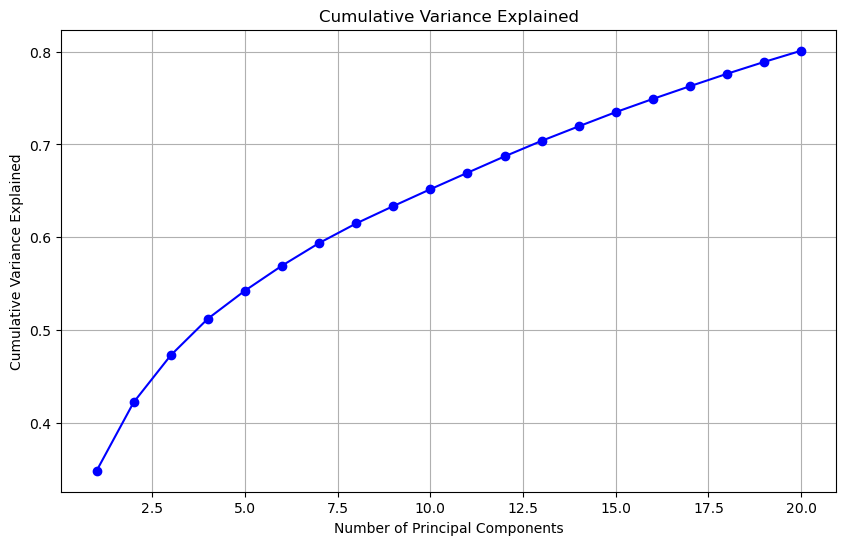

In [477]:

def plot_cumulative_variance(X):
    # Calculate cumulative variance explained
    cumulative_variance = pca.explained_variance_ratio_.cumsum()

    # Plot cumulative variance explained
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
    plt.title('Cumulative Variance Explained')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.grid()
    plt.show()

# Usage:
# Replace 'X' with your dataset
plot_cumulative_variance(X)

In [478]:
pca_data

array([[-2.27632669, -1.88500216, -1.63385575, ..., -0.84864042,
         1.60899692,  1.48338465],
       [-1.70792557, -2.30687199, -3.18615383, ...,  0.73520384,
         0.26691177, -0.53508371],
       [-1.95346519, -1.90594475,  0.53906222, ...,  0.69927277,
         0.19684657,  0.76395455],
       ...,
       [-0.93830467, -2.70033396,  3.03586206, ..., -0.76212957,
        -0.39790065,  0.89055757],
       [-2.275149  , -2.09978122,  1.68463331, ...,  0.67906225,
        -0.56458246, -1.20609911],
       [-1.6184515 , -2.25212155,  1.50074142, ...,  1.00978714,
         0.59446193, -1.15839922]])

In [479]:
pca_data.shape

(3232, 20)

In [480]:
pd.DataFrame(pca_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.276327,-1.885002,-1.633856,2.953520,-0.119755,-0.932509,1.463589,0.446554,-2.333322,-1.449179,-0.640029,-0.335867,1.044283,-0.155650,-0.062683,-0.877581,0.094112,-0.848640,1.608997,1.483385
1,-1.707926,-2.306872,-3.186154,3.123047,0.249380,2.409252,1.343242,0.175257,-1.780934,-1.313902,-1.111445,-0.043347,0.009194,0.627535,-0.565790,1.281241,-0.086200,0.735204,0.266912,-0.535084
2,-1.953465,-1.905945,0.539062,2.767371,-0.550247,1.550021,1.855238,1.336357,-3.016760,-0.387588,0.076375,-0.631488,-0.545476,0.714527,0.023412,1.021009,0.707079,0.699273,0.196847,0.763955
3,-0.949779,-0.641896,4.584448,-2.294166,-0.628209,0.275865,2.653758,0.357873,-2.793583,-1.964420,-0.675001,-1.206860,0.159019,0.720800,0.624579,0.722808,0.481132,-0.651041,5.836968,-1.774598
4,28.360890,-0.879824,-0.771337,-0.312548,-0.136808,0.029713,1.981119,2.024079,-1.950100,-1.301469,1.595724,0.550305,1.481095,-0.350669,-0.392139,-0.206822,-0.241567,-0.245994,-0.222695,-0.129344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,-2.178356,-0.679400,-2.513460,-3.095416,-0.013916,1.442519,-1.385058,0.982863,3.634281,-0.491344,1.804570,-2.163825,0.315659,-0.285490,-1.839047,-0.033869,-1.319976,-0.390622,-0.975738,-0.852767
3228,-2.643163,-2.936262,0.268402,-1.514851,-0.299923,-3.281497,-0.677098,-0.814534,1.438149,-0.746395,-0.158853,0.586568,0.062738,-0.444780,-0.636651,0.729769,-0.751094,-0.186140,-0.058714,-0.729082
3229,-0.938305,-2.700334,3.035862,-1.099695,0.190113,-2.557146,-0.812326,-3.131533,-1.776894,0.371594,4.146870,-0.144663,-2.313539,0.376866,0.537103,0.519036,-1.148214,-0.762130,-0.397901,0.890558
3230,-2.275149,-2.099781,1.684633,-0.707283,2.623643,-1.989555,0.624136,0.146532,1.300490,-0.668843,0.909030,-0.479921,-0.892413,0.654715,-0.368319,0.938689,0.649213,0.679062,-0.564582,-1.206099


In [481]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size= 0.3, random_state=29)

## LOG REG

In [482]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

C:\Users\SHILPA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHILPA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [483]:
lr_pred 

array([2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 3, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 2, 2, 3, 2, 2, 3, 2, 0, 3, 3, 2, 2, 2, 0, 2, 1, 3, 2,
       2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 3, 2, 2, 0, 2, 2, 0, 0, 3, 2, 0, 2, 2, 2, 3, 0, 2, 2, 3,
       3, 2, 0, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 0, 2, 0, 3, 2, 2, 0, 1,
       3, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3, 2, 2, 2, 0, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 3, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 0, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 3, 2, 2, 0, 2, 2, 2,
       3, 3, 1, 2, 2, 2, 2, 3, 2, 3, 0, 0, 3, 2, 3, 1, 2, 2, 2, 0, 2, 3,
       2, 3, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 3, 3, 3, 2, 3, 3,
       2, 2, 2, 0, 0, 0, 2, 3, 3, 2, 2, 0, 0, 2, 3,

In [484]:
cf=confusion_matrix(y_test,lr_pred)
cf

array([[235,   1,   0,   6],
       [  0,  46,   0,   0],
       [  0,   0, 497,  25],
       [  7,   0,  36, 117]], dtype=int64)

In [485]:
acc=accuracy_score(y_test, lr_pred)
acc

0.9226804123711341

In [486]:
report = classification_report(y_test, lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       242
           1       0.98      1.00      0.99        46
           2       0.93      0.95      0.94       522
           3       0.79      0.73      0.76       160

    accuracy                           0.92       970
   macro avg       0.92      0.91      0.92       970
weighted avg       0.92      0.92      0.92       970



## DT

In [487]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt= dt.predict(X_test)

In [488]:
cf=confusion_matrix(y_test,y_pred_dt)
cf

array([[204,   1,  13,  24],
       [  0,  45,   0,   1],
       [  7,   0, 473,  42],
       [ 29,   0,  60,  71]], dtype=int64)

In [489]:
acc=accuracy_score(y_test, y_pred_dt)
acc

0.8175257731958763

In [490]:
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       242
           1       0.98      0.98      0.98        46
           2       0.87      0.91      0.89       522
           3       0.51      0.44      0.48       160

    accuracy                           0.82       970
   macro avg       0.80      0.79      0.80       970
weighted avg       0.81      0.82      0.81       970



## RF

In [491]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 45,max_depth=3,n_estimators=100)

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

C:\Users\SHILPA\AppData\Local\Temp\ipykernel_30156\1511485948.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [492]:
cf=confusion_matrix(y_test,y_pred_rf)
cf

array([[225,   1,  16,   0],
       [  0,  40,   6,   0],
       [ 22,   0, 500,   0],
       [ 40,   0, 120,   0]], dtype=int64)

In [493]:
acc=accuracy_score(y_test, y_pred_rf)
acc

0.788659793814433

In [494]:
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       242
           1       0.98      0.87      0.92        46
           2       0.78      0.96      0.86       522
           3       0.00      0.00      0.00       160

    accuracy                           0.79       970
   macro avg       0.63      0.69      0.66       970
weighted avg       0.66      0.79      0.72       970



C:\Users\SHILPA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHILPA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHILPA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Final output:

the Good model is the logistic regression to find out the most accurate prediction having 92% accuracy. 